In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import csv
import inspect
import pandas as pd
from pandas import DataFrame

import subprocess

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [2]:
with open ('BasicModel.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ',')
    for row in readCSV:
        print(row)

['Hole,Core,Section,Interval', 'L*', 'SST', 'Age', 'Depth (amcd)', 'Alkane', 'Alkane1', 'Alkanol', 'Alkanol1']
['B110', '#N/A', '18.17', '0', '0.17', '80.71', '0', '11.03', '54.81']
['B118', '58.62', '19', '6.91', '0.25', '50.18', '249.32', '56.99', '205.33']
['B1118', '57.9', '18.6', '8.51', '0.35', '46', '228.35', '129.01', '373.05']
['B1136', '59.24', '16.37', '11.39', '0.53', '82.42', '357.22', '105.81', '276.9']
['B1150', '59.65', '15.37', '13.63', '0.67', '162.31', '815.69', '203.19', '554.64']
['B1166', '61.43', '13', '16.19', '0.83', '158.03', '561.26', '260.23', '1045.58']
['B1174', '52.49', '12.28', '17.47', '0.91', '249.96', '722.81', '33.8', '151.49']
['B1188', '52.14', '11.21', '19.71', '1.05', '239.01', '625.48', '29.85', '116.57']
['B11102', '53.72', '13.6', '21.95', '1.19', '244.62', '687.05', '106.47', '396.52']
['B11124', '58.62', '12.3', '25.47', '1.41', '323.83', '883.94', '41.96', '128.03']
['B11132', '50.06', '12.3', '26.75', '1.49', '448.16', '1069.23', '39.32', 

['C5588', '55.87', '13.16', '889', '42.64', '220.66', '564.62', '#N/A', '#N/A']
['C5590', '55.72', '13.45', '889.44', '42.66', '204.48', '508.14', '#N/A', '#N/A']
['C5592', '56.36', '11.74', '889.89', '42.68', '356.22', '899.34', '#N/A', '#N/A']
['C5594', '56.82', '12.91', '890.33', '42.7', '241.22', '622.69', '#N/A', '#N/A']
['C5598', '55.33', '13.54', '891.23', '42.74', '299.61', '768.31', '#N/A', '#N/A']
['C55100', '52.95', '13.47', '891.67', '42.76', '231.45', '614.53', '#N/A', '#N/A']
['C55102', '56.18', '12.89', '892.12', '42.78', '375.12', '955.57', '#N/A', '#N/A']
['C55104', '51.02', '12.57', '892.56', '42.8', '355.5', '932.3', '#N/A', '#N/A']
['C55108', '56.14', '13.7', '893.46', '42.84', '259', '731.35', '#N/A', '#N/A']
['C55110', '55.9', '14.1', '893.68', '42.85', '210.41', '598.9', '#N/A', '#N/A']
['C55112', '57.71', '13.76', '894.13', '42.87', '315.56', '910.74', '#N/A', '#N/A']
['C55114', '50.23', '14.18', '894.57', '42.89', '231.32', '669.89', '#N/A', '#N/A']
['C55118', 

In [3]:
data = pd.read_csv('BasicModel.csv')
data.columns = ('Hole,Core,Section,Interval','L*','SST','Age','Depth (amcd)','Alkane','Alkane1','Alkanol','Alkanol1')
data.head

<bound method NDFrame.head of      Hole,Core,Section,Interval     L*    SST      Age  Depth (amcd)  Alkane  \
0                          B110    NaN  18.17     0.00          0.17   80.71   
1                          B118  58.62  19.00     6.91          0.25   50.18   
2                         B1118  57.90  18.60     8.51          0.35   46.00   
3                         B1136  59.24  16.37    11.39          0.53   82.42   
4                         B1150  59.65  15.37    13.63          0.67  162.31   
5                         B1166  61.43  13.00    16.19          0.83  158.03   
6                         B1174  52.49  12.28    17.47          0.91  249.96   
7                         B1188  52.14  11.21    19.71          1.05  239.01   
8                        B11102  53.72  13.60    21.95          1.19  244.62   
9                        B11124  58.62  12.30    25.47          1.41  323.83   
10                       B11132  50.06  12.30    26.75          1.49  448.16   
11        

In [4]:
import pandas as pd

data = pd.DataFrame(data)

data = data.dropna()

In [5]:
data.head

<bound method NDFrame.head of      Hole,Core,Section,Interval     L*    SST      Age  Depth (amcd)  Alkane  \
1                          B118  58.62  19.00     6.91          0.25   50.18   
2                         B1118  57.90  18.60     8.51          0.35   46.00   
3                         B1136  59.24  16.37    11.39          0.53   82.42   
4                         B1150  59.65  15.37    13.63          0.67  162.31   
5                         B1166  61.43  13.00    16.19          0.83  158.03   
6                         B1174  52.49  12.28    17.47          0.91  249.96   
7                         B1188  52.14  11.21    19.71          1.05  239.01   
8                        B11102  53.72  13.60    21.95          1.19  244.62   
9                        B11124  58.62  12.30    25.47          1.41  323.83   
10                       B11132  50.06  12.30    26.75          1.49  448.16   
11                       B11142  56.10  11.81    28.35          1.59  275.69   
12        

In [6]:
data.rename(columns = {'Hole,Core,Section,Interval':'sample'}, inplace = True)
data.rename(columns = {'Depth (amcd)':'amcd'}, inplace = True)

In [7]:
print(data[1:10])

    sample     L*    SST    Age  amcd  Alkane  Alkane1  Alkanol  Alkanol1
2    B1118  57.90  18.60   8.51  0.35   46.00   228.35   129.01    373.05
3    B1136  59.24  16.37  11.39  0.53   82.42   357.22   105.81    276.90
4    B1150  59.65  15.37  13.63  0.67  162.31   815.69   203.19    554.64
5    B1166  61.43  13.00  16.19  0.83  158.03   561.26   260.23   1045.58
6    B1174  52.49  12.28  17.47  0.91  249.96   722.81    33.80    151.49
7    B1188  52.14  11.21  19.71  1.05  239.01   625.48    29.85    116.57
8   B11102  53.72  13.60  21.95  1.19  244.62   687.05   106.47    396.52
9   B11124  58.62  12.30  25.47  1.41  323.83   883.94    41.96    128.03
10  B11132  50.06  12.30  26.75  1.49  448.16  1069.23    39.32    118.01


In [8]:
data.columns.get_loc("L*")


#data.astype('int32').types

1

In [9]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

print(train_dataset[1:10])

     sample     L*    SST     Age   amcd  Alkane  Alkane1  Alkanol  Alkanol1
144   B2514  73.11  15.36  306.78  13.80   89.90   315.96     4.37     30.05
317   C3376  79.77  15.84  385.44  17.38   44.01   205.79    34.92    157.68
61   C22108  67.88  16.51  111.81   5.75  100.83   284.80    36.99    168.92
306   C3352  79.44  16.01  380.42  17.14   26.12   119.71    43.77    300.34
148   B2554  72.42  15.47  317.45  14.20   40.22   143.03    74.50    367.80
38    B1372  65.67  14.51   65.80   3.89  151.87   605.00    20.99     99.58
160   B2578  79.55  17.23  323.88  14.44   27.34   104.07     4.05     20.72
76    C2374  56.97  16.20  142.42   6.95  305.35   872.46    21.67     93.50
227   B2662  60.71  11.04  354.86  15.78  166.69   709.46    66.94    377.87


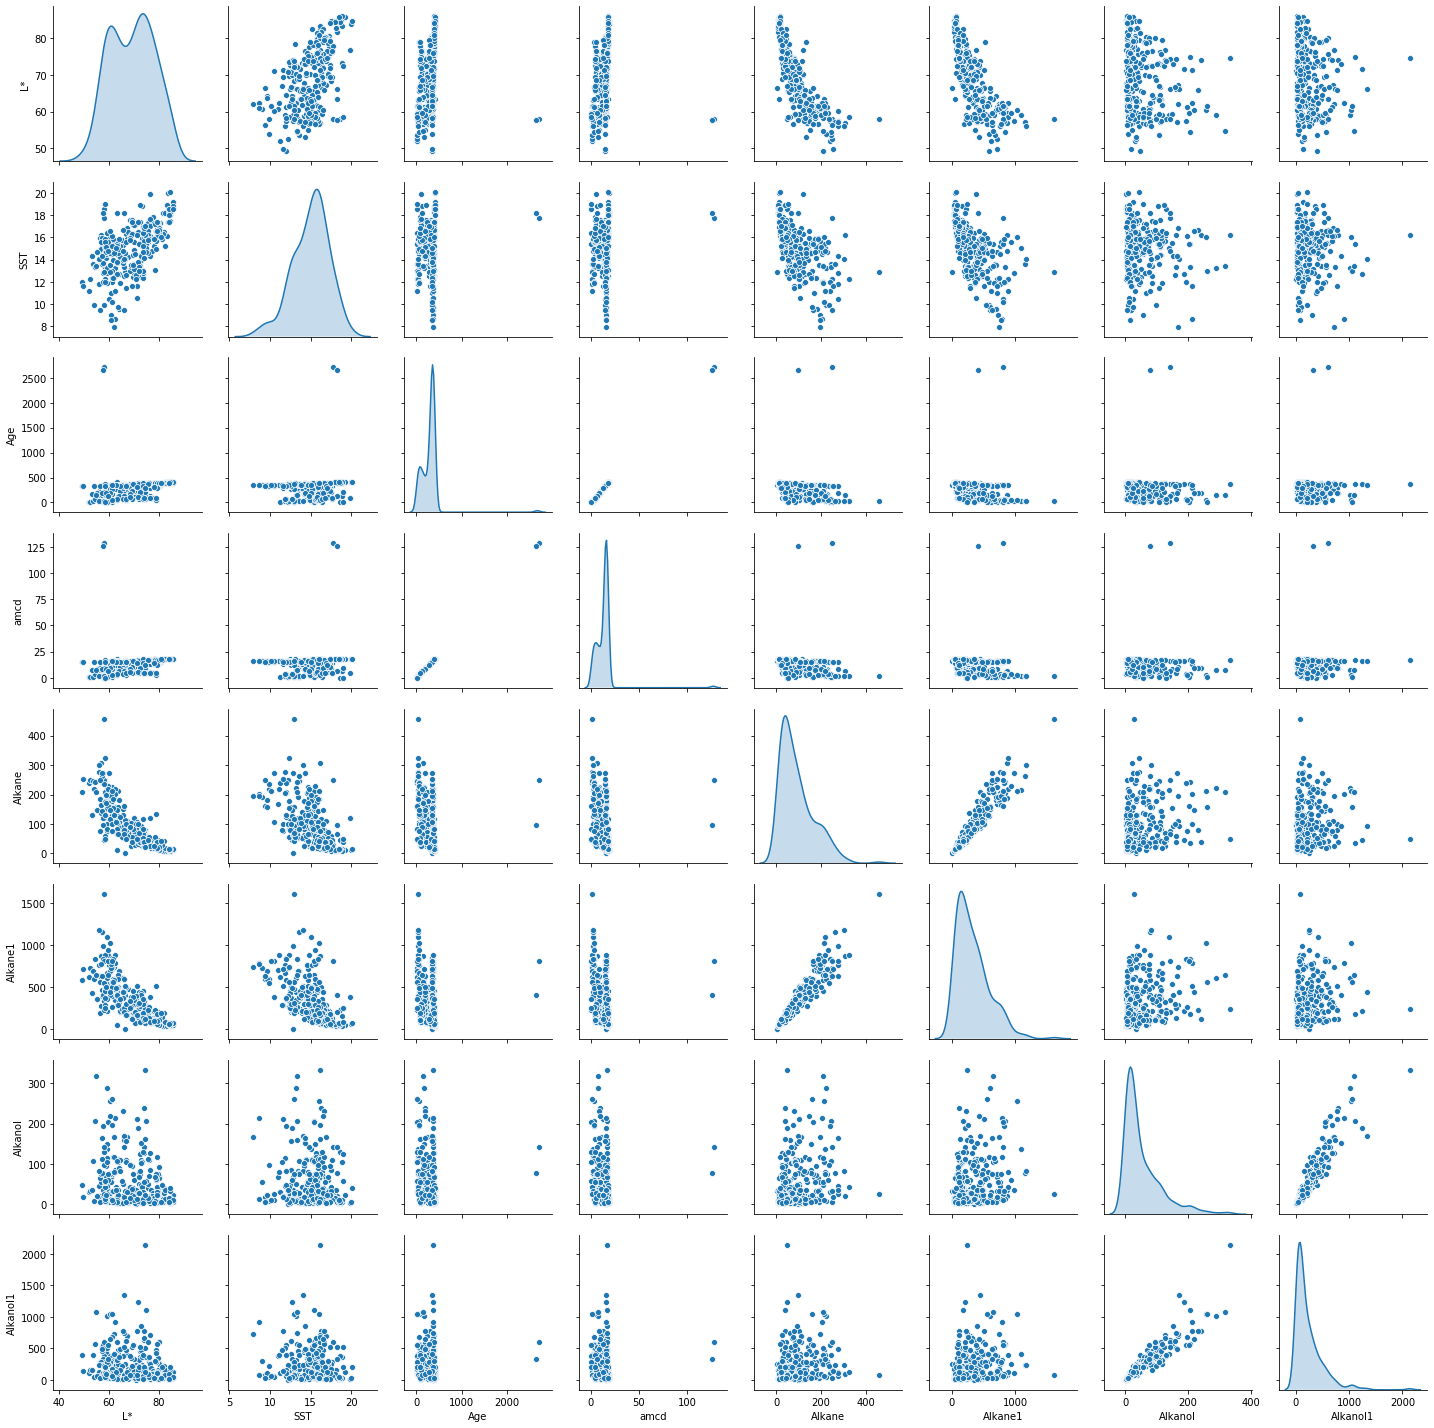

In [10]:
sns.pairplot(train_dataset[["L*", "SST", "Age", "amcd", "Alkane", "Alkane1", "Alkanol", "Alkanol1"]], diag_kind="kde")

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("L*")
train_stats = train_stats.transpose()
train_stats

count        mean         std   min       25%      50%       75%  \
SST       296.0   15.052703    2.223635  7.98   13.5550   15.365   16.4950   
Age       296.0  292.344122  232.179401  6.91  178.4975  336.300  368.3350   
amcd      296.0   13.301554   10.776830  0.25    8.6050   14.890   16.5050   
Alkane    296.0   92.891182   74.894631  0.79   33.8725   73.215  130.3225   
Alkane1   296.0  336.958007  255.503469  3.63  131.1325  271.730  475.3125   
Alkanol   296.0   53.773378   60.422390  0.47   11.7450   29.840   76.1675   
Alkanol1  296.0  234.778041  262.196574  3.08   56.7075  136.635  320.5550   

              max  
SST         20.09  
Age       2706.93  
amcd       128.59  
Alkane     458.04  
Alkane1   1608.70  
Alkanol    333.89  
Alkanol1  2137.05

In [12]:
train_labels = train_dataset.pop('L*')
test_labels = test_dataset.pop('L*')

In [13]:
#data.dtypes

In [16]:
train_dataset1 = train_dataset.drop(columns = ["sample"])
test_dataset1 = test_dataset.drop(columns = ["sample"])
#train_sample = train_dataset.drop(columns = ["L*","Age", "amcd", "Alkane", "Alkane1", "Alkanol", "Alkanol1"])
#test_sample = test_dataset.drop(columns = ["L*", "Age", "amcd", "Alkane", "Alkane1", "Alkanol", "Alkanol1"])

In [17]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset1)
normed_test_data = norm(test_dataset1)

In [20]:
#normed_train_data1 = pd.concat([train_sample,normed_train_data], axis = 1)
#normed_test_data1 = pd.concat([test_sample,normed_test_data], axis = 1)

#normed_train_data2 = normed_train_data.drop(normed_train_data.columns["SST"])
#normed_test_data2 = normed_test_data.drop(normed_test_data.columns["SST"])

#normed_train_data3 = normed_train_data1.drop(normed_train_data1.columns["SST"])
#normed_train_data3 = normed_test_data1.drop(normed_test_data1.columns["SST"])

#print(normed_train_data2[1:20])

#print(normed_train_data[1:20])

In [21]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(normed_train_data.shape)
print(normed_train_data[1:20])
print(normed_train_data.keys())

(296, 7)
          SST       Age      amcd    Alkane   Alkane1   Alkanol  Alkanol1
144  0.138196  0.062176  0.046252 -0.039939 -0.082183 -0.817634 -0.780819
317  0.354059  0.400965  0.378446 -0.652666 -0.513371 -0.312026 -0.294047
61   0.655367 -0.777563 -0.700721  0.106000 -0.204138 -0.277768 -0.251178
306  0.430510  0.379344  0.356176 -0.891535 -0.850274 -0.165557  0.250049
148  0.187664  0.108131  0.083368 -0.703270 -0.759003  0.343029  0.507337
38  -0.244061 -0.975729 -0.873314  0.787491  1.049074 -0.542570 -0.515636
160  0.979161  0.135825  0.105638 -0.875245 -0.911487 -0.822930 -0.816403
76   0.515956 -0.645725 -0.589371  2.836770  2.095870 -0.531316 -0.538825
227 -1.804569  0.269257  0.229979  0.985369  1.457914  0.217910  0.545743
102  0.529447 -0.401130 -0.365743 -0.727571 -0.860215  3.075956  2.091606
46   0.632881 -0.921891 -0.817639 -0.797136 -0.895049  0.450605  0.254854
250 -0.833187  0.306082  0.272663  0.010933  0.396284 -0.067250  0.316716
236 -2.452157  0.283685  0.24

In [24]:
example_batch = normed_train_data [:10]
example_result = model.predict(example_batch)
example_result



array([[0.15372315],
       [0.14494844],
       [0.1234841 ],
       [0.22284122],
       [0.12124801],
       [0.07519343],
       [0.31855255],
       [0.2338826 ],
       [0.21851581],
       [0.29647654]], dtype=float32)

In [25]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mae       mse   val_loss   val_mae    val_mse  epoch
995  7.288824  1.854683  7.288825  25.451190  3.675983  25.451189    995
996  7.423543  1.898991  7.423543  25.314533  3.630610  25.314533    996
997  7.398232  1.876989  7.398232  26.043421  3.670730  26.043421    997
998  7.401776  1.929725  7.401776  26.878278  3.702722  26.878277    998
999  7.566864  1.916708  7.566864  25.646957  3.574168  25.646955    999

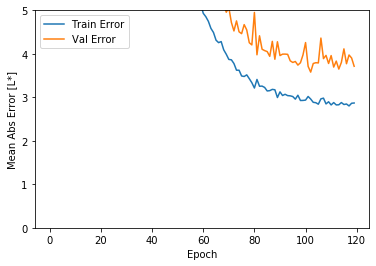

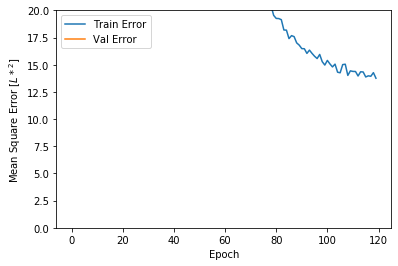

In [32]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [L*]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$L*^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
.....................................

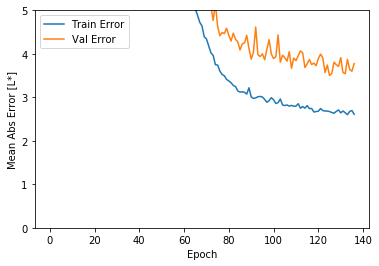

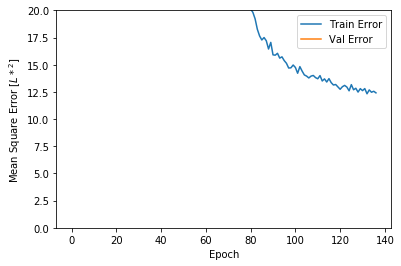

In [33]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [34]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} L*".format(mae))

74/74 - 0s - loss: 21.7091 - mae: 3.5502 - mse: 21.7091
Testing set Mean Abs Error:  3.55 L*


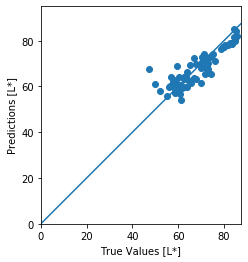

In [35]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [L*]')
plt.ylabel('Predictions [L*]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

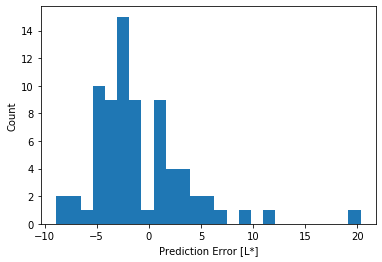

In [36]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [L*]")
_ = plt.ylabel("Count")